# Entrenando un algoritmo de Machine Learning para predecir la contaminación en Beijing

## Integrantes:
- Juan Diego Londoño
- Mario Alejandro Saldarriaga



## FORMULACIÓN DEL PROBLEMA
1. ¿El aprendizaje automático es apropiado para este problema y por qué si o no?
    - Si es apropiado para este problema pues lo que se pretende hacer es entrenar a un algoritmo para que sea capaz de predecir la cantidad de contaminación que puede haber en un determinado sitio en una determinada fecha.

2. ¿Cuál es el problema de ML si hay uno y cómo sería la métrica de éxito?
    - EL problema de ML es el poder entrenarlo para predecir, esto se hará con regresión, la métrica de éxito seria lograr llegar a uno de los valores que se tienen para la característica pm2.5.

3. ¿Qué tipo de problema de ML es este?
    - Es un problema de predicción mediante el método de regresión
    
4. ¿Los datos son apropiados? 
    - Si, pues se cuenta con no solo datos de la contaminación, sino también del comportamiento del clima, lo cual es una parte influyente en la distribución de esa contaminación en Beijing



## [Dataset](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data):
Tenemos un dataset con **43824 Muestras** referentes a las partículas por millón (PM 2.5) presentes en el aire de Beijing, China por hora entre los años 2010 y 2014 y con **12 Características**:

### Características:
- No: Fila
- Año
- Mes
- Dia
- Hora
- PM 2.5: Concentración de partículas por millón (PM2.5), medida en $ug/m^3$
- DEWP: Punto de rocío, medido en °F
- TEMP: Temperatura media en °F
- PRES: Preción atmosférica, medida en hPa (unidades de presión)
- cbwd: Dirección del viendo combinada
- Iws: Velocidad del viento acumulada medida en m/s
- Is: Horas de nieve acumuladas
- Ir: Horas de lluvia acumuladas


# Librerías a utilizar:
- Pandas: ``` pip install pandas ```
- Numpy: ``` pip install numpy ```
- Seaborn: ``` pip install seaborn ```
- Matplotlib Pyplot: ``` pip install matplotlib ```

# Importamos estas librerías y archivos a nuestro código:
- Configuraremos las tablas de pandas quitando la limitación del ancho de columna
- Importamos el dataset, llamado data.csv y lo asignaremos a una variable llamada df_pol
- Eliminaremos la columna que nos indica el número de fila, aquí no la necesitamos

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

df_pol = pd.read_csv("data.csv", sep=",")
del df_pol["No"]

## Información del dataset:


In [3]:
print("Número de características: {}".format(df_pol.shape[1]))
print("Número de muestras {}\n".format(df_pol.shape[0]))

Número de características: 12
Número de muestras 43824



In [4]:
print("Datos nulos por característica:")
df_pol.isnull().sum()

Datos nulos por característica:


year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [5]:
df_pol.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


Analicemos ahora las estadísticas de nuestro dataframe:

In [6]:
df_pol.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


## Eliminacón  de los datos nulos:
Cuando se buscó la información y descripción del data set se deja ver que en cuanto a los datos numéricos, la única característica que presenta datos nulos o erróneos es pm2.5, en la cual hay 2067 datos nulos, así que se procedió a eliminar estos nulos pues para le futuro entrenamiento del algortimo.

In [7]:

df_pol = df_pol.dropna()
print("Número de características: {}".format(df_pol.shape[1]))
print("Número de muestras {}\n".format(df_pol.shape[0]))

Número de características: 12
Número de muestras 41757



Nueva comprobación de si hay datos nulos en el data set

In [8]:
df_pol.isna().any()

year     False
month    False
day      False
hour     False
pm2.5    False
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

## Datos categóricos:
Para los datos categóricos se llegó a la conclusión que en términos de polución la dirección del viento es fundamental pero el algoritmo de entrenamiento no entenderá estos datos de forma categórica, por eso se procedió a codificar estos datos, se ve que los  datos Nominales, esto quiere decir que no tienen una jerarquía, sería problemático para nuestro algoritmo asignarle valores (1,2,3,4) a cada dirección del viento, así es preferible usar variables *Dummie* y tratar estos datos como binarios, de este modo se obtendrán predicciones más precisas al ejecutar el algoritmo de machine learning.
Al crear estas variables e insertarlas en nuestra tabla, se eliminará la variable cbwd, e ingresaran 3 columnas ¿Por qué 3? se puede eliminar una de ellas y asumir que esta será la ausencia de las otras, así no se saturara la tabla con muchas columnas nuevas.

Para esto se usara  ``` pd.get_dummies ``` y se le dara  ``` drop_first = True ``` para eliminar la primera columna, es decir, la variable NE significará que las demás están en cero.


### Dirección combinada del viento (cbwd)

In [9]:
print("Primero analizamos qué categorías tenemos: ")
df_pol.cbwd.value_counts()

Primero analizamos qué categorías tenemos: 


SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

**CV** no es un punto cardinal, investigando obtuvimos que cv es un valor **errado** en traducción, y que corresponde a la dirección SW, vamos a corregirlo rápidamente:

In [10]:
df_pol['cbwd'].replace('cv', 'SW', inplace = True)
df_pol.cbwd.value_counts()

SE    14573
NW    13484
SW     8944
NE     4756
Name: cbwd, dtype: int64

In [11]:
dummies = pd.get_dummies(df_pol['cbwd'], drop_first=True)
dummies.head(40000)

,NW,SE,SW
24,0,1,0
25,0,1,0
26,0,1,0
27,0,1,0
28,0,1,0
...,...,...,...
42019,0,1,0
42020,0,1,0
42021,0,1,0
42022,0,0,1


Hecho esto, procedemos a descartar la columna cbdw de nuestro dataframe y le daremos por otro lado las columnas NW, SE y SW que serán binarias.

In [12]:
df_pol = df_pol.drop(['cbwd'], axis=1)
df_pol = pd.concat([df_pol, dummies], axis=1)

print("Demos un vistazo ahora a nuestro dataframe: ")
df_pol.head(10)

Demos un vistazo ahora a nuestro dataframe: 


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NW,SE,SW
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,1,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,1,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,1,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,1,0
29,2010,1,2,5,109.0,-7,-6.0,1022.0,7.14,3,0,0,1,0
30,2010,1,2,6,105.0,-7,-6.0,1023.0,8.93,4,0,0,1,0
31,2010,1,2,7,124.0,-7,-5.0,1024.0,10.72,0,0,0,1,0
32,2010,1,2,8,120.0,-8,-6.0,1024.0,12.51,0,0,0,1,0
33,2010,1,2,9,132.0,-7,-5.0,1025.0,14.30,0,0,0,1,0


## Estadísticas de cada característica:
Obtendremos la cuenta, media, mínimos, máximos y otra información relevante sobre nuestros datos

In [13]:
df_pol.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NW,SE,SW
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,0.322916,0.348995,0.214192
std,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,0.467596,0.476658,0.410265
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000


## Gráficos por variable

Otra parte importante en el análisis de los datos son la correlaciones entre variables, se analizaran la correlación entre las características, una correlación mayor a 80%  indicaría que hay una relación entre las variables y que podemos eliminar una de ellas, pero como para el entrenamiento del algoritmo se utilizara regresión es mejor no eliminarlas para que este tenga una mejor precisión y no sea sesgado.
Para esto usaremos el método corr de pandas, que nos devuelve una matriz de correlación y le daremos un fondo gradiente, con esto nos será más fácil ver con los colores más oscuros las variables que tienen una mayor correlación.
Además se hará un gráfico múltiple que a su vez contiene gráficos de dispersión de cada uno las variables, esto con el fin de mostrar con una mayor facilidad la distribución de los datos.


Analizaremos diagramas de cajas y bigotes por cada característica, esto nos permitirá seleccionar los datos atípicos y decidir qué hacer con ellos:

<AxesSubplot:>

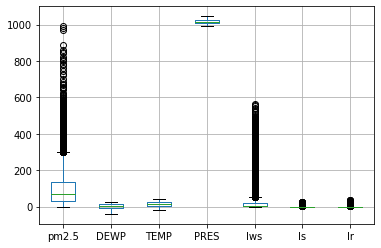

In [14]:
df_pol.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'])

Podemos ver que el punto de rocío, la temperatura y la presión no tienen datos atípicos, mientras pm2.5, Iws, Is e Ir sí los poseen

## Eliminando datos atípicos:

Lo primero es que según parece, almenos durante este período, la lluvia y la nieve han estado bastante ausentes, esto causa que todo lo diferente a cero se convierta casi automáticamente en valor atípico. Por lo que vamos a eliminar estas variables.

Posteriormente calcularemos los cuartiles, el rango intercuartil y eliminaremos los datos fuera de este rango.

Numero de muestras despues de limpieza: 35382


<AxesSubplot:>

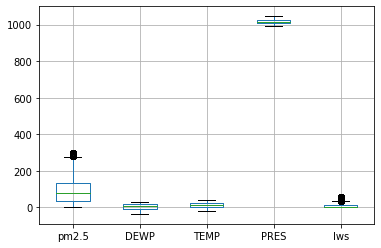

In [15]:
df_pol.drop(['Is', 'Ir'], axis=1, inplace=True)
limpiar = ['pm2.5','Iws']
for i in limpiar:
    per25 = df_pol[i].quantile(0.25)
    per75 = df_pol[i].quantile(0.75)
    IQR = per75 - per25
    UpperLimit = per75 + 1.5*IQR
    LowerLimit = per25 - 1.5*IQR
    df_pol = df_pol.loc[(df_pol[i] < UpperLimit) & (df_pol[i] > LowerLimit)]

print("Numero de muestras despues de limpieza: {}".format(df_pol.shape[0]))

df_pol.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws'])


In [16]:
df_pol.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
count,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000,35382.000000
mean,2012.074105,6.534368,15.590809,11.406958,92.081850,3.353315,13.474026,1015.651150,10.366714,0.267028,0.373467,0.234752
std,1.410007,3.307873,8.814077,6.851601,69.161317,14.105751,12.132410,10.209925,12.587591,0.442414,0.483731,0.423850
min,2010.000000,1.000000,1.000000,0.000000,1.000000,-36.000000,-18.000000,991.000000,0.450000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,6.000000,36.000000,-9.000000,3.000000,1007.000000,1.790000,0.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.000000,76.000000,5.000000,15.000000,1015.000000,4.020000,0.000000,0.000000,0.000000
75%,2013.000000,9.000000,23.000000,17.000000,133.000000,16.000000,24.000000,1024.000000,14.750000,1.000000,1.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,298.000000,28.000000,42.000000,1046.000000,55.430000,1.000000,1.000000,1.000000


## Normalizando nuestros datos:
Tenemos nuestros datos en diferentes unidades de medida, vamos a normalizar nuestra información para lograr una predicción más precisa y una lectura grafica más sencilla.

In [17]:
df_pol = df_pol.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_pol.head(40000)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
24,0.0,0.0,0.033333,0.000000,0.430976,0.312500,0.233333,0.527273,0.024372,0.0,1.0,0.0
25,0.0,0.0,0.033333,0.043478,0.494949,0.328125,0.233333,0.527273,0.040560,0.0,1.0,0.0
26,0.0,0.0,0.033333,0.086957,0.531987,0.390625,0.216667,0.545455,0.056748,0.0,1.0,0.0
27,0.0,0.0,0.033333,0.130435,0.606061,0.453125,0.216667,0.563636,0.089305,0.0,1.0,0.0
28,0.0,0.0,0.033333,0.173913,0.461279,0.453125,0.216667,0.563636,0.105493,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43796,1.0,1.0,0.966667,0.869565,0.084175,0.390625,0.383333,0.563636,0.227537,1.0,0.0,0.0
43797,1.0,1.0,0.966667,0.913043,0.063973,0.375000,0.366667,0.581818,0.390142,1.0,0.0,0.0
43798,1.0,1.0,0.966667,0.956522,0.023569,0.234375,0.333333,0.618182,0.568934,1.0,0.0,0.0
43799,1.0,1.0,0.966667,1.000000,0.050505,0.218750,0.300000,0.636364,0.698981,1.0,0.0,0.0


<AxesSubplot:>

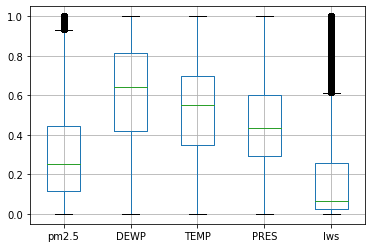

In [18]:
df_pol.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws'])


## Analizando correlaciones:



## Mapa de calor

- Este mapa nos permite ver mucho mas graficamente la correlacion que poseen las caracteristicaz entre si, este a parte de tener una gama de colores los cuales mientras mas rojos significan una correlación muy alta, al igual que si es azul oscuro, y si es azul claro indica que no tienen correlación ninguna, tambien esta en terminos de porcentage, donde 1 o -1 indican una alta correlación y mientras mas cercano este a cero significa que esta poco relacionado.

In [19]:
corr = df_pol.corr()
corr.style.background_gradient(cmap='coolwarm' , axis=None)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
year,1.000000,-0.002679,-0.005681,0.000813,-0.063157,-0.003975,0.053330,-0.009327,-0.031839,-0.042234,0.012671,0.023433
month,-0.002679,1.000000,0.010106,-0.001829,0.010356,0.272411,0.192970,-0.077175,-0.093844,0.026561,-0.067071,0.059117
day,-0.005681,0.010106,1.000000,0.000133,0.066946,0.036897,0.026728,-0.005617,0.002690,-0.014684,0.015512,0.003312
hour,0.000813,-0.001829,0.000133,1.000000,-0.017964,-0.008291,0.165243,-0.050372,0.139601,-0.168058,0.249508,-0.055322
pm2.5,-0.063157,0.010356,0.066946,-0.017964,1.000000,0.172522,-0.064665,-0.067313,-0.167071,-0.171047,0.105796,0.123148
DEWP,-0.003975,0.272411,0.036897,-0.008291,0.172522,1.000000,0.829598,-0.779209,-0.064185,-0.228617,0.217569,0.046666
TEMP,0.053330,0.192970,0.026728,0.165243,-0.064665,0.829598,1.000000,-0.822825,0.064681,-0.223268,0.284694,-0.026834
PRES,-0.009327,-0.077175,-0.005617,-0.050372,-0.067313,-0.779209,-0.822825,1.000000,-0.024648,0.168743,-0.213820,0.002417
Iws,-0.031839,-0.093844,0.002690,0.139601,-0.167071,-0.064185,0.064681,-0.024648,1.000000,0.148626,0.271222,-0.371342
NW,-0.042234,0.026561,-0.014684,-0.168058,-0.171047,-0.228617,-0.223268,0.168743,0.148626,1.000000,-0.466003,-0.334302


## Graficos de dispersion 

- Esto es otra represntancion de correlaciones de la caracterizticas y el modo de verlo es que tan igual de dispersos estan las caracterizticas.

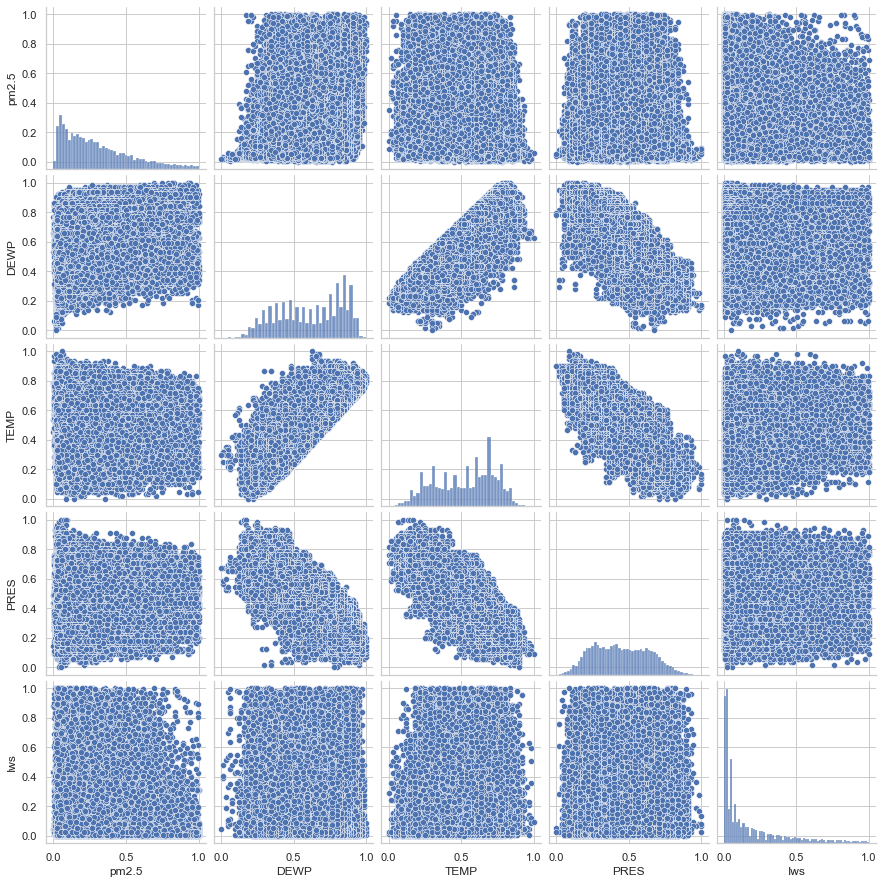

In [20]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(df_pol[["pm2.5","DEWP","TEMP","PRES","Iws"]])

Podemos ver que hay relaciones bastante fuertes entre:
- Temperatura y Presión Atmosférica
- Punto de rocío y Presión Atmosférica
- Temperatura y Punto de rocío


## Visualizando nuestro dataset ya procesado:

### Mapa de calor:

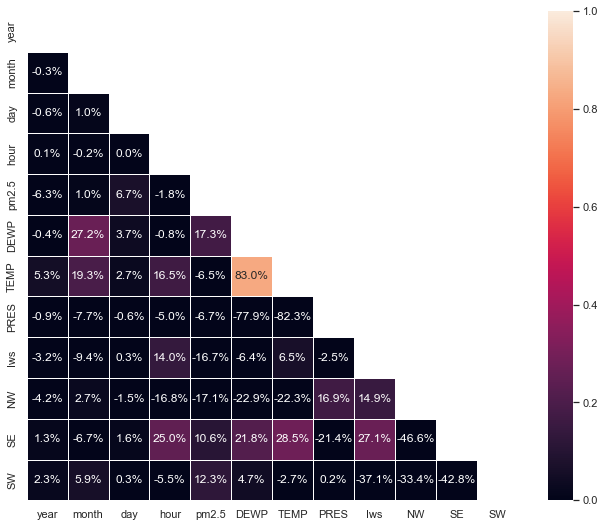

In [21]:
sns.set(style="whitegrid", context="notebook")
corr = df_pol.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr, annot=True, fmt=".1%", linewidths=.5, mask = mask, vmax=1, vmin = 0)

### Cajas y bigotes

<AxesSubplot:>

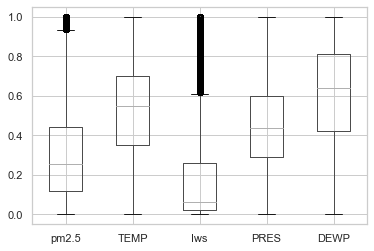

In [22]:
df_pol.boxplot(['pm2.5', 'TEMP', 'Iws', 'PRES', 'DEWP'])

### Vistazo al dataset:
Hechos todos los ajustes necesarios, vamos a visualizar nuestro dataset ya procesado y listo para ser usado por nuestro algoritmo.

Hemos terminado con **36939** muestras y **8** características (Recordemos que las últimas 3 son dummies de la velocidad del viento).

In [23]:
df_pol.head(40000)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,NW,SE,SW
24,0.0,0.0,0.033333,0.000000,0.430976,0.312500,0.233333,0.527273,0.024372,0.0,1.0,0.0
25,0.0,0.0,0.033333,0.043478,0.494949,0.328125,0.233333,0.527273,0.040560,0.0,1.0,0.0
26,0.0,0.0,0.033333,0.086957,0.531987,0.390625,0.216667,0.545455,0.056748,0.0,1.0,0.0
27,0.0,0.0,0.033333,0.130435,0.606061,0.453125,0.216667,0.563636,0.089305,0.0,1.0,0.0
28,0.0,0.0,0.033333,0.173913,0.461279,0.453125,0.216667,0.563636,0.105493,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43796,1.0,1.0,0.966667,0.869565,0.084175,0.390625,0.383333,0.563636,0.227537,1.0,0.0,0.0
43797,1.0,1.0,0.966667,0.913043,0.063973,0.375000,0.366667,0.581818,0.390142,1.0,0.0,0.0
43798,1.0,1.0,0.966667,0.956522,0.023569,0.234375,0.333333,0.618182,0.568934,1.0,0.0,0.0
43799,1.0,1.0,0.966667,1.000000,0.050505,0.218750,0.300000,0.636364,0.698981,1.0,0.0,0.0


### Exportamos el dataset:

In [24]:
df_pol.to_csv('dataset_limpio.csv', index=False)

## Conclusiones

- Después de analizado el dataset, encontramos que habían algunas características altamente correlacionadas aun así se deben dejar pues son necesarias para el algoritmo que se implementara despues. Hecho esto, se procedio a normalizar los datos, puesto que estaban en unidades diferentes y esto es bastante perjudicial al momento de entrenar el algoritmo. Como punto final, en el último diagrama de cajas y bigotes, ciertas características parecen tener datos atípicos, pero analizándolos a fondo consideramos que son datos normales y que no se trata de errores de medición, así pues, no fueron eliminados puesto que son fundamentales a la hora de entrenar adecuadamente nuestro algoritmo.

